# Monthly Milk Production

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
sns.set()

In [96]:
def get_milk():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        milk = pd.read_sql_table('milk_volume', con)
    return milk

In [97]:
milk = get_milk().set_index('date')

In [107]:
def plot_unique_cows_milked_by_month(milk, start='2016-01-01', end='2017-12-31'):
    milk['animal_count'] = milk.groupby('date')['animal_id'].nunique()
    milk = milk[start:end].resample('M').mean()['animal_count'].reset_index()
    
    milk = milk[milk['animal_count'] > 75]
    milk['formated_date'] = milk['date'].dt.strftime('%Y-%m')
    
    minimum = milk['animal_count'].min()
    maximum = milk['animal_count'].max()
    
    ax = sns.pointplot(x='formated_date', y='animal_count', data=milk)
    count_min = ax.axhline(minimum, ls='--', c='red')
    count_max = ax.axhline(maximum, ls='--', c='green')
    _ = plt.ylabel('Animal Count')
    _ = plt.xlabel('Month')
    _ = plt.xticks(rotation='vertical')
    _ = plt.title('Average Count Animals Milked Per Month')
    _ = plt.legend([count_min, count_max], 
                   [f'Min: {round(minimum, 2)}', f'Max: {round(maximum, 2)}'], 
                   loc='center')
    plt.savefig('figures/unique_animals_per_month.png', dpi=300, bbox_inches='tight')
    return ax

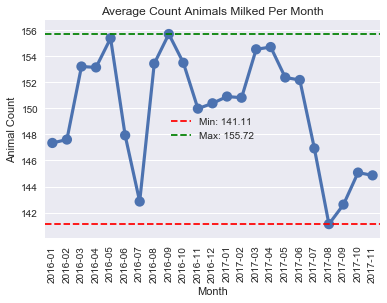

In [108]:
plot_unique_cows_milked_by_month(milk)
plt.show()

In [117]:
def plot_total_milk_by_month(milk, start='2016-01-01', end='2017-12-31'):
    milk = milk[start:end].resample('M').sum()['milk_weight'].reset_index()
    
    milk['formated_date'] = milk['date'].dt.strftime('%Y-%m')
    
    minimum = milk['milk_weight'].min()
    maximum = milk['milk_weight'].max()
    
    ax = sns.pointplot(x='formated_date', y='milk_weight', data=milk)
    weight_min = ax.axhline(minimum, ls='--', c='red')
    weight_max = ax.axhline(maximum, ls='--', c='green')
    _ = plt.ylabel('Total Milk-Weight')
    _ = plt.xlabel('Month')
    _ = plt.xticks(rotation='vertical')
    _ = plt.title(f'Monthly Milk Totals: {start} to {end}')
    _ = plt.legend([weight_min, weight_max], 
                   [f'Min: {int(minimum)} milk-pounds', f'Max: {int(maximum)} milk-pounds'], 
                   loc='center')
     
    plt.savefig('figures/herd_total_milk_per_month.png', dpi=300, bbox_inches='tight')
    return ax

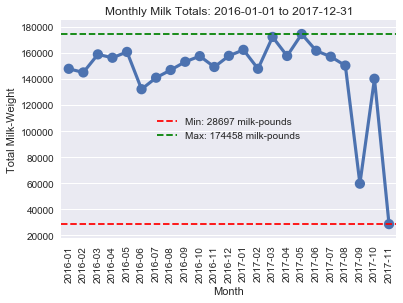

In [118]:
plot_total_milk_by_month(milk, start='2016-01-01', end='2017-12-31')
plt.show()